## Make these plots more deployable for a presentation

In [1]:
import os
notebook_wd = os.getcwd()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

os.chdir(os.path.join(notebook_wd, '..'))
from src.d00_utils.conf_utils import *

In [3]:
compounds, water = load_compounds()
exp_droplet_nh3g = load_experiments(['bd_nh3g'])
constants = load_constants()
paths = load_paths()
exp_droplet_nh3g

{'bd_nh3g': {'raw_data_file': '190924-butenedial-nh3g-droplets.csv',
  'composition': {'Butenedial': 0.75, 'PEG-6': 0.2},
  'solution_name': ['butenedial-peg6-181016', 'butenedial-peg6-181018'],
  'bad_idx': None,
  'idx_range': None,
  'trap_time': None,
  'other_query': 'p283>=10000 and (solution=="butenedial-peg6-181016" or solution=="butenedial-peg6-181018")',
  'y_col': 'mz84_mz283',
  'p283_cutoff': 30000,
  'columns_to_keep': ['trapped',
   'solution',
   'nominal_nh3_mM',
   'mz84_mz283',
   'mz85_mz283',
   'mz149_mz283']}}

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# created a new plotting function
from src.d00_utils.data_utils import import_ms_data
from src.d05_reporting.plot_ms_data import plot_ms_data_with_clusters, plot_ms_data

In [6]:
df_processed = import_ms_data(paths['processed_data'])
df_processed.columns

Index(['mins', 'solution', 'nominal_nh3_mM', 'mz84_mz283', 'mz85_mz283',
       'mz149_mz283', 'experiment'],
      dtype='object')

In [8]:
df_clustered = import_ms_data(paths['clustered_data'])
df_clustered.columns

Index(['mz84_mz283', 'mz85_mz283', 'mz149_mz283', 'mins', 'mz84_mz283_std',
       'mz85_mz283_std', 'mz149_mz283_std', 'mins_std', 'experiment'],
      dtype='object')

IndexError: index 2 is out of bounds for axis 0 with size 2

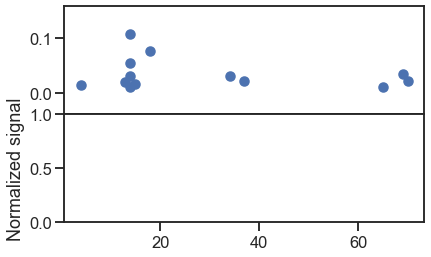

In [70]:
fig, ax = plt.subplots(2,1, figsize=(5,3), sharex=True)
fig.subplots_adjust(0,0,1,1,0,0)

ax[0].scatter(df_processed[df_processed.experiment=='bd_nh3g_29'].mins, 
              df_processed[df_processed.experiment=='bd_nh3g_29'].mz84_mz283)

ax[1].set_ylabel("Normalized signal")
ax[2].set_xlabel("Time (mins)")

C:\Users\joh3146\Documents\droplet-chemistry\src\d00_utils\..\..\results\figs_out\191002-rel-ms-bd_nh3g_29-Pyrrolinone-Butenedial-Diazepine.png


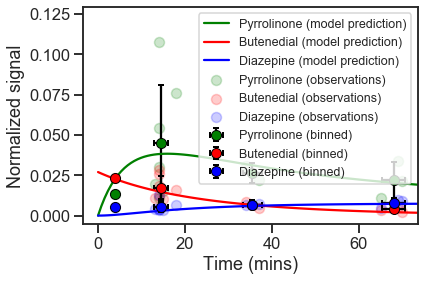

In [93]:
plot_ms_data_with_clusters(df_processed[df_processed.experiment=='bd_nh3g_29'], 
                           df_clustered[df_clustered.experiment=='bd_nh3g_29'],
                           t_col_name='mins', y_col_names=['mz84_mz283','mz85_mz283','mz149_mz283'],
                           analytes=['Pyrrolinone','Butenedial','Diazepine'],
                           point_colors=['green','red','blue'], t_error_col_name='mins_std',
                           y_error_col_names=['mz84_mz283_std','mz85_mz283_std','mz149_mz283_std'], experiment_name='bd_nh3g_29');
plt.plot(ts, results[:, 1]*.25, color='green', label='Pyrrolinone (model prediction)')
plt.plot(ts, results[:, 0]*0.027, color='red', label='Butenedial (model prediction)')
plt.plot(ts, results[:, 2]*0.027, color='blue', label='Diazepine (model prediction)')
plt.legend(fontsize='x-small');

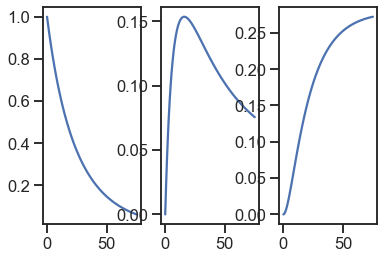

In [71]:
## Toy model to view PYR concentrations under varying NH3g conditions
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

kevap_pyr = 1/170
kevap_bd = 1/85
kevap_dia = 1/10000
krxn = 1/30
krxn2 = 1/10

fig, ax = plt.subplots(1, 3)
def toymod(y, t): 
    bd, pyr, dia = y
    dydt = [-krxn*bd - kevap_bd*bd*bd, krxn*bd*bd - kevap_pyr*pyr - krxn2*pyr*bd, krxn2*pyr*bd - kevap_dia]

    return dydt
    
ts = np.linspace(0, 75, 100)
results = odeint(
    toymod, 
    y0=[1, 0, 0], t=ts)

ax[0].plot(ts, results[:, 0])
ax[1].plot(ts, results[:, 1])
ax[2].plot(ts, results[:, 2])

In [87]:
df_clustered.max().values[:-1].max()

68.0

In [91]:
a = [1, 3]
np.max(a)

3